Coming up with a simple linear regression algorithm 


In [2]:
import pandas as pd 
import numpy as np

In [3]:
# Generate synthetic dataset: Car Age (years), Mileage (thousands)
np.random.seed(42)
car_age = np.random.randint(1, 15, 50)  # Cars between 1 and 15 years old
mileage = np.random.randint(10, 200, 50)  # Mileage between 10k and 200k km
prices = 50000 - (car_age * 2000) - (mileage * 100) + np.random.randint(-2000, 2000, 50)

# Create DataFrame
df = pd.DataFrame({'Age': car_age, 'Mileage': mileage, 'Price': prices})

# Display first few rows
print(df.head())

   Age  Mileage  Price
0    7      140  20379
1    4       60  34492
2   13      144  10712
3   11       30  24180
4    8       82  25862


In [4]:
df.dtypes

Age        int32
Mileage    int32
Price      int32
dtype: object

Linear regression using normal equations 

In [5]:
def train_normal_eq(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term (column of 1s)
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    
    b = theta[0]  # Bias (intercept)
    w = theta[1:]  # Weights (coefficients)
    
    return w, b

# Prepare features and target
X = df[['Age', 'Mileage']].values
y = df['Price'].values

# Train using Normal Equation
w_ne, b_ne = train_normal_eq(X, y)
print(f"Normal Equation Weights: {w_ne}, Bias: {b_ne}")


Normal Equation Weights: [-2009.76804471   -96.38343127], Bias: 49760.67342560957


In [6]:
y_pred = X.dot(w_ne) + b_ne

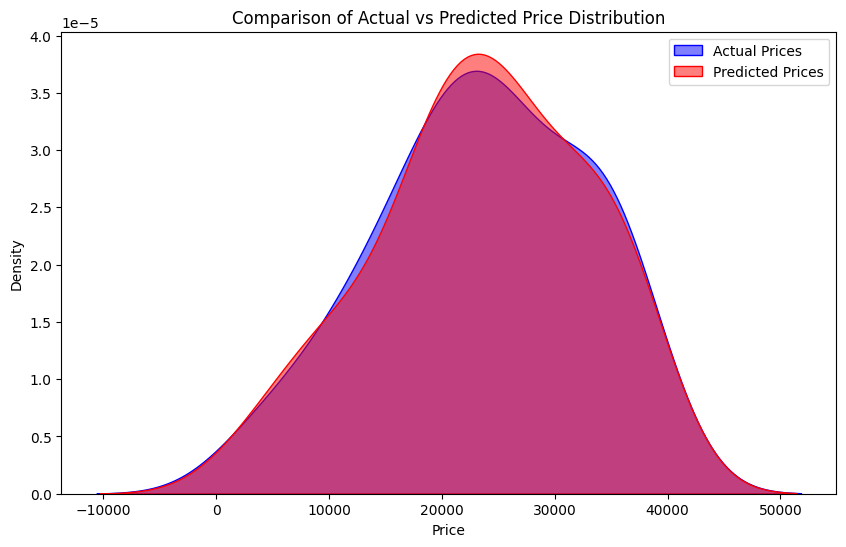

In [7]:

import seaborn as sns
import matplotlib.pyplot as plt# Plot the distribution curve

%matplotlib inline 
plt.figure(figsize=(10, 6))
sns.kdeplot(y, label="Actual Prices", fill=True, color='blue', alpha=0.5)
sns.kdeplot(y_pred, label="Predicted Prices", fill=True, color='red', alpha=0.5)

plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Comparison of Actual vs Predicted Price Distribution")
plt.legend()
plt.show()

*Linear Regression Using Gradient Descent*

In [6]:
def train_gradient_descent(X, y, learning_rate=0.00001, epochs=1000):
    m, n = X.shape
    w = np.random.randn(n)
    b = np.random.randn()
    
    for _ in range(epochs):
        y_pred = np.dot(X, w) + b
        loss = np.mean((y - y_pred) ** 2)  # MSE Loss
        
        # Compute gradients
        dw = (-2 / m) * np.dot(X.T, (y - y_pred))
        db = (-2 / m) * np.sum(y - y_pred)
        
        # Update weights
        w -= learning_rate * dw
        b -= learning_rate * db
    
    return w, b

# Train using Gradient Descent
w_gd, b_gd = train_gradient_descent(X, y)
print(f"Gradient Descent Weights: {w_gd}, Bias: {b_gd}")


Gradient Descent Weights: [624.52018025 115.74051683], Bias: 149.79398737628128


*Train Using Scikit-Learn*


In [7]:
from sklearn.linear_model import LinearRegression

# Train model
model = LinearRegression()
model.fit(X, y)

print(f"Sklearn Weights: {model.coef_}, Bias: {model.intercept_}")


Sklearn Weights: [-2009.76804471   -96.38343127], Bias: 49760.67342560958


*Train Using XGBoost*

In [10]:
df.head()

,Age,Mileage,Price
0,7,140,20379
1,4,60,34492
2,13,144,10712
3,11,30,24180
4,8,82,25862


In [9]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X, y)

print(f"XGBoost Predictions on First 5 Cars: {xgb_model.predict(X[:5])}")


XGBoost Predictions on First 5 Cars: [20379.996 34492.22  10711.776 24179.82  25862.098]
